In [1]:
%matplotlib inline

In [2]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

,ds,y,deaths
0,2020-03-11,0.000000,0
1,2020-03-12,0.693147,0
2,2020-03-13,2.079442,0
3,2020-03-14,2.079442,0
4,2020-03-15,2.564949,0


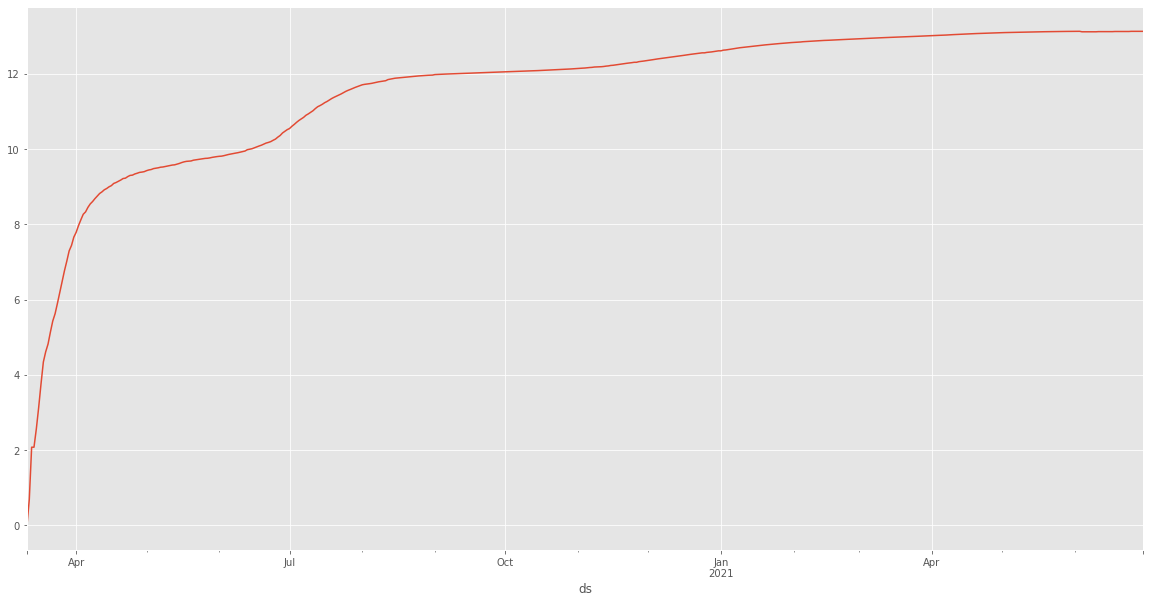

In [3]:
df1 = pd.read_csv('Flcases.csv', index_col='date', parse_dates=True)
df1 = df1.drop(['county','state','fips','cured'], axis =1)
df1 = df1.reset_index().rename(columns={'date':'ds', 'cases':'y'})
df1['y'] = np.log(df1['y'])
df1.set_index('ds').y.plot()
df1.head()

In [4]:
model = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = True, changepoint_range = .9)
model.fit(df1);
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
502,2021-07-26,13.155336,12.702710,13.561190
503,2021-07-27,13.156050,12.687229,13.579352
504,2021-07-28,13.156763,12.670048,13.610967
505,2021-07-29,13.157476,12.667981,13.691893
506,2021-07-30,13.158189,12.602099,13.700061


In [6]:
forecast.sort_values('trend', ascending=False)[:10]
print(forecast[['ds', 'trend']].sort_values('trend', ascending=False)[:30])

            ds      trend
506 2021-07-30  12.232465
505 2021-07-29  12.231752
504 2021-07-28  12.231039
503 2021-07-27  12.230325
502 2021-07-26  12.229612
501 2021-07-25  12.228899
500 2021-07-24  12.228186
499 2021-07-23  12.227472
498 2021-07-22  12.226759
497 2021-07-21  12.226046
496 2021-07-20  12.225333
495 2021-07-19  12.224619
494 2021-07-18  12.223906
493 2021-07-17  12.223193
492 2021-07-16  12.222479
491 2021-07-15  12.221766
490 2021-07-14  12.221053
489 2021-07-13  12.220340
488 2021-07-12  12.219626
487 2021-07-11  12.218913
486 2021-07-10  12.218200
485 2021-07-09  12.217487
484 2021-07-08  12.216773
483 2021-07-07  12.216060
482 2021-07-06  12.215347
481 2021-07-05  12.214634
480 2021-07-04  12.213920
479 2021-07-03  12.213207
478 2021-07-02  12.212494
477 2021-07-01  12.211781


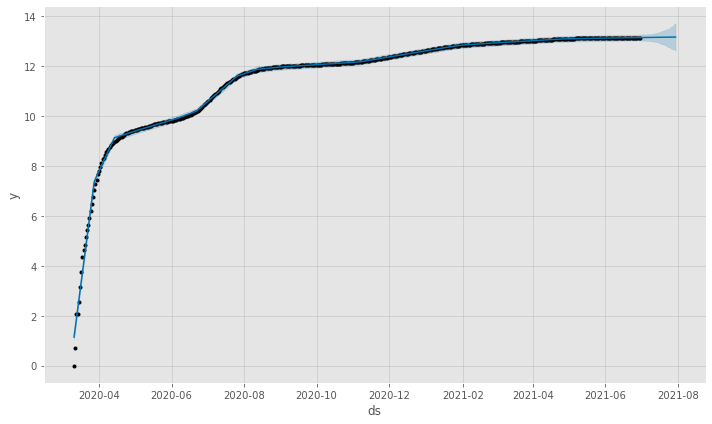

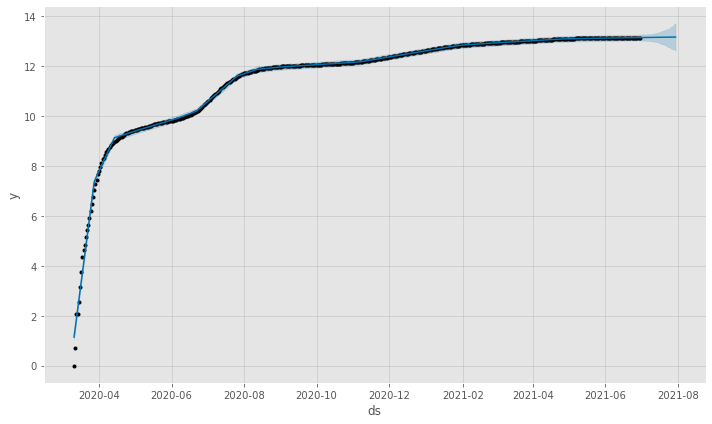

In [7]:
model.plot(forecast)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
metric_df = forecast.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()

In [11]:
metric_df.dropna(inplace=True)

In [12]:
r2_score(metric_df.y, metric_df.yhat)

0.9979670389718587

In [13]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.008192363726355702

In [14]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.028505900907809793

In [15]:
np.sqrt(np.mean((metric_df.y - metric_df.yhat)**2))

0.09051167729279855